# **Over View**

It's a major task for Machine Vision course 2022

second milestone part 2: CNN classifier:
Use TensorFlow to build a CNN network and train it to classify images.

# **Import Libraries**

In [ ]:
# Importing required libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras 
from keras.models import * 
from keras.layers import * 
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report , confusion_matrix, accuracy_score
# Import the DenseNet201 model from the keras applications module
from tensorflow.keras.applications import DenseNet201
from keras.datasets import cifar100


169001437/169001437 [==============================] - 3s 0us/step
Shape of x_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of x_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


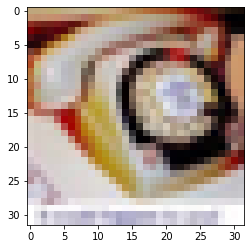

In [ ]:
# Loading the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Plotting an image from the training set
plt.imshow(x_train[5], cmap='gray')

# Printing the shapes of the training and test sets
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)


In [ ]:
y_train_ = keras.utils.to_categorical(y_train)
y_test_ = keras.utils.to_categorical(y_test)

**normalization**

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

# Model of DenseNet201

DenseNet201 is a type of convolutional neural network architecture that was introduced in the paper "Densely Connected Convolutional Networks" by Gao Huang et al. in 2016. The architecture is characterized by its use of dense blocks, where each layer is connected to every other layer in the block.

In [ ]:
# Instantiate the DenseNet201 model
pretrained_model3 = DenseNet201(input_shape=(32,32,3), include_top=False, weights='imagenet', pooling='avg')
# Freeze the weights of the model to prevent further training
pretrained_model3.trainable = False


74836368/74836368 [==============================] - 0s 0us/step


In [ ]:
# Define the inputs of the model as the input of the pretrained model
inputs3 = pretrained_model3.input

# Add a dense layer with 512 units and a ReLU activation
x3 = Dense(512, activation='relu')(pretrained_model3.output)

# Add a dense layer with 100 units and a softmax activation
outputs3 = Dense(100, activation='softmax')(x3)

# Instantiate a Model object using the inputs and outputs
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)


In [ ]:
# Print the summary of the model's architecture
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 38, 38, 3)   0           ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 16, 16, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1/conv[0][0]']             
                                                                                              

In [ ]:
# Compile the model
model.compile(loss = keras.losses.categorical_crossentropy, optimizer="adam", metrics=['accuracy'])

# Fit the model on the training data
result = model.fit(x_train, y_train_,
                  epochs=30,
                  batch_size=32,
                  validation_data=(x_test, y_test_),
                  callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)])


Epoch 1/30
1563/1563 [==============================] - 453s 279ms/step - loss: 2.8627 - accuracy: 0.2922 - val_loss: 2.5916 - val_accuracy: 0.3367
Epoch 2/30
1563/1563 [==============================] - 415s 266ms/step - loss: 2.2806 - accuracy: 0.4043 - val_loss: 2.4851 - val_accuracy: 0.3650
Epoch 3/30
1563/1563 [==============================] - 418s 268ms/step - loss: 2.0112 - accuracy: 0.4602 - val_loss: 2.4600 - val_accuracy: 0.3778
Epoch 4/30
1563/1563 [==============================] - 414s 265ms/step - loss: 1.7655 - accuracy: 0.5161 - val_loss: 2.5055 - val_accuracy: 0.3837
Epoch 5/30
1563/1563 [==============================] - 414s 265ms/step - loss: 1.5353 - accuracy: 0.5712 - val_loss: 2.5943 - val_accuracy: 0.3813
Epoch 6/30
1563/1563 [==============================] - 412s 264ms/step - loss: 1.3191 - accuracy: 0.6253 - val_loss: 2.7213 - val_accuracy: 0.3689


# Results (the performance metrics of each classifier (TP, TN, FP, FN)

In [ ]:
# Generate predictions on the test data
y_pred = np.argmax(model.predict(x_test), axis=1)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

313/313 [==============================] - 73s 221ms/step
Confusion Matrix:
[[69  2  0 ...  0  0  0]
 [ 2 43  2 ...  0  0  0]
 [ 0  6 24 ...  0  5  0]
 ...
 [ 0  0  0 ... 39  0  1]
 [ 1  2  5 ...  0 25  0]
 [ 0  0  0 ...  0  0 65]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       100
           1       0.43      0.43      0.43       100
           2       0.26      0.24      0.25       100
           3       0.14      0.10      0.12       100
           4       0.12      0.07      0.09       100
           5       0.47      0.30      0.37       100
           6       0.28      0.33      0.30       100
           7       0.46      0.37      0.41       100
           8       0.69      0.31      0.43       100
           9       0.62      0.50      0.55       100
          10       0.35      0.37      0.36       100
          11       0.20      0.11      0.14       100
          12       0.43      0.40      0.

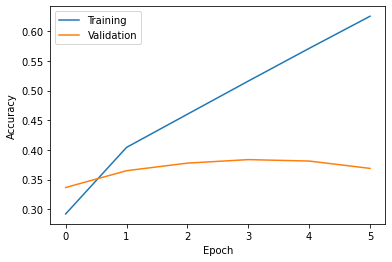

In [ ]:
# Plot the training and validation accuracy over the number of epochs
plt.plot(result.history['accuracy'], label='Training')
plt.plot(result.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


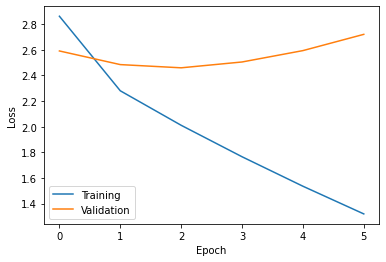

In [ ]:
# Plot the training and validation loss over the number of epochs
plt.plot(result.history['loss'], label='Training')
plt.plot(result.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
